In [26]:
from engine import Value
from draw_bot import draw_bot
import random

class Neuron:
    #nin: number of inputs a neuron should expect
    def __init__(self, nin:int=1):
        self.weights = [Value(data=random.uniform(-1,1), label='weight') for _ in range(nin)]
        self.bias = Value(data=random.uniform(-1,1), label='bias')

    def __call__(self, vals):
        act = sum((weight*val for weight, val in zip(self.weights, vals)), self.bias)
        out = act.tan()
        return out

    def parameters(self):
        return self.weights + [self.bias]

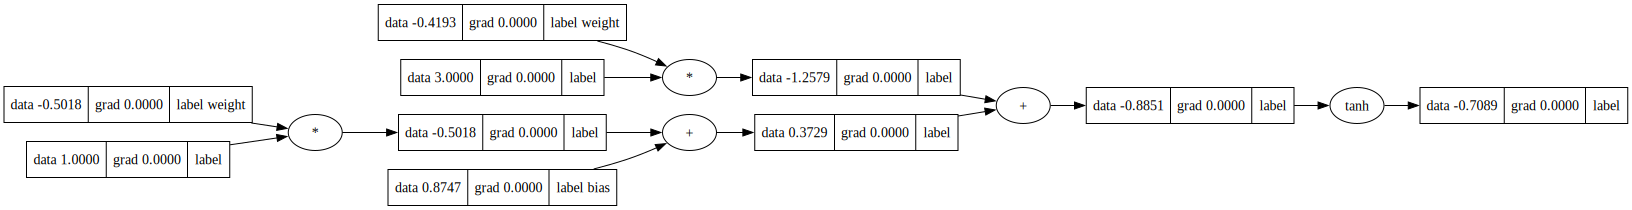

In [27]:
# Initialize neuron with 2 inputs and 1 output
n = Neuron(2)
# feed neuron some data
input = [1,3]
output = n(input)
# draw how neuron would look like
draw_bot(output)

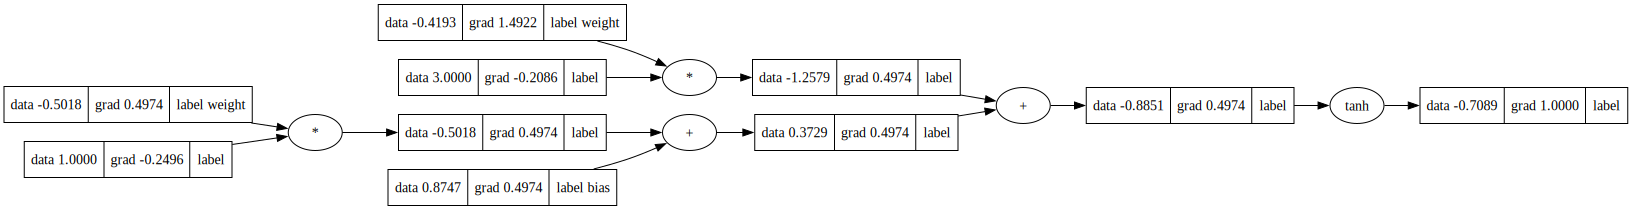

In [28]:
# backpropogate the neuron to calculate gradient decent of weights and bias
output.backward()
# draw the neuron
draw_bot(output)

In [29]:
n.parameters()

[Value(data=-0.5018347557032201, grad=0.49740095770672754, _op=None, label=weight),
 Value(data=-0.41931620433074324, grad=1.4922028731201826, _op=None, label=weight),
 Value(data=0.8747293752546006, grad=0.49740095770672754, _op=None, label=bias)]

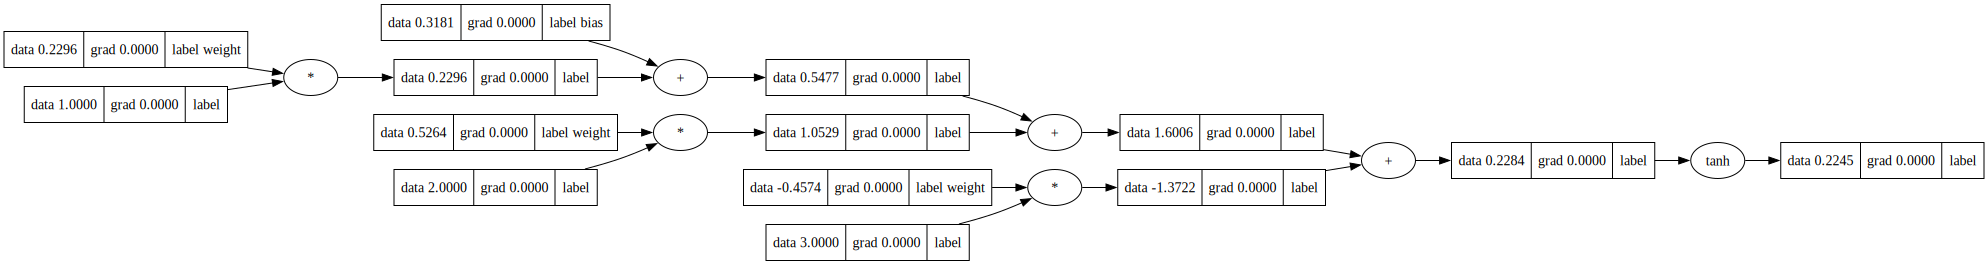

In [30]:
class Layer:
    #nin: number of inputs a layer should handle
    #nout: number of outputs given by layer or number of neurons
    def __init__(self, nin: int, nout: int):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x: list[float]) -> list[Value]:
        outs = [neuron(x) for neuron in self.neurons]
        return outs[0] if len(outs)==1 else outs

    def parameters(self):
        output = []
        for neuron in self.neurons:
            output.extend(neuron.parameters())
        return output

lay_in = Layer(3,1)
out_layer = lay_in([1,2,3])
draw_bot(out_layer)

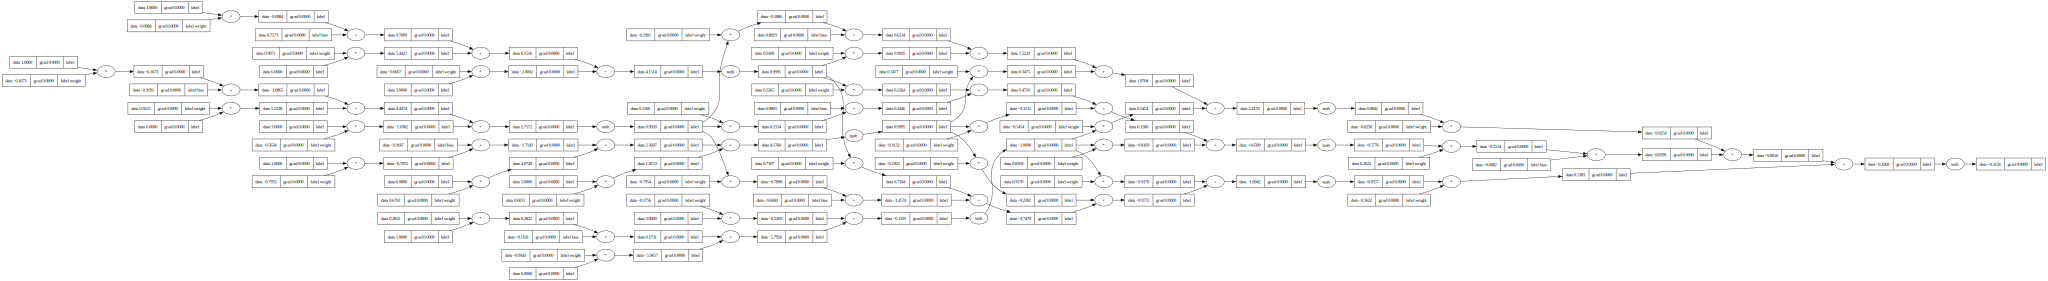

In [31]:
class MLP:
    # nin: number of inputs expected for MLP
    # nouts: list of counts of neurons each layer going to have
    def __init__(self, nin: int, nouts: list[int]):
        sn = [nin] + nouts
        self.layers = [Layer(sn[i], sn[i+1]) for i in range(len(nouts))]

    def __call__(self, x: list[float]) -> list[Value]:
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

mlp = MLP(3, [4,3,2])
out_mlp = mlp([1,6,3])
draw_bot(out_mlp[0])


In [32]:
def mse_loss(exp_out:list[float], res_out: list[Value]):
    loss = sum( (eo-ro)**2 for eo, ro in zip(exp_out, res_out))
    return loss

In [33]:
# xs = [[random.randint(-5,5) for i in range(3)] for i in range(4)]
xs = [[2.0, 3.0, -1.0], [3.0, -1.0, 0.5], [0.5, 1.0, 1.0], [1.0, 1.0, -1.0]]

In [34]:
test_mlp = MLP(3, [4,4,1])
ys = [1, -1, -1, 1]

In [35]:
def train_model(xs, ys):
    # forward propagation
    ypred = [test_mlp(x) for x in xs]
    # print(ypred)
    # calculating loss
    loss = mse_loss(ys, ypred)

    for param in test_mlp.parameters():
        param.grad = 0

    # backward propagation
    loss.backward()

    # changing parameters based on gradients
    for param in test_mlp.parameters():
        param.data += -0.01*param.grad

    return loss

In [36]:
for i in range(100):
    print(i, train_model(xs, ys))

# train_model(xs, ys)

0 Value(data=7.919468148969676, grad=1, _op=+, label=)
1 Value(data=6.963938294348426, grad=1, _op=+, label=)
2 Value(data=5.954370628559846, grad=1, _op=+, label=)
3 Value(data=5.231441722312798, grad=1, _op=+, label=)
4 Value(data=4.963915937962718, grad=1, _op=+, label=)
5 Value(data=4.839943873129828, grad=1, _op=+, label=)
6 Value(data=4.7463446274013945, grad=1, _op=+, label=)
7 Value(data=4.66452077261426, grad=1, _op=+, label=)
8 Value(data=4.590903848019339, grad=1, _op=+, label=)
9 Value(data=4.524284246420868, grad=1, _op=+, label=)
10 Value(data=4.463891195963052, grad=1, _op=+, label=)
11 Value(data=4.409071524516906, grad=1, _op=+, label=)
12 Value(data=4.359228605950981, grad=1, _op=+, label=)
13 Value(data=4.313808913400796, grad=1, _op=+, label=)
14 Value(data=4.2722986600488495, grad=1, _op=+, label=)
15 Value(data=4.234222608826722, grad=1, _op=+, label=)
16 Value(data=4.199142907935834, grad=1, _op=+, label=)
17 Value(data=4.166657290365431, grad=1, _op=+, label=)
1

In [40]:
for x in xs:
    print(test_mlp(x))

Value(data=0.869359047870341, grad=0, _op=tanh, label=)
Value(data=-0.8133292917980004, grad=0, _op=tanh, label=)
Value(data=-0.846239556717988, grad=0, _op=tanh, label=)
Value(data=0.8257005588614991, grad=0, _op=tanh, label=)
